In [1]:
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Extraction des données

In [ ]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)


len(athletes_data)

WENDLER Landon :
   ski_points: 39.37692307692308
   air_points: 12.190769230769233
   time_points: 14.86076923076923
   top_air_execution: 6.838461538461539
CAVET Benjamin :
   ski_points: 44.97142857142857
   air_points: 12.749047619047618
   time_points: 16.33809523809524
   top_air_execution: 7.995238095238095
GAY Paul Andrea :
   ski_points: 34.7
   air_points: 9.49
   time_points: 13.58
   top_air_execution: 5.6
LOGAN Oliver :
   ski_points: 34.75
   air_points: 11.0225
   time_points: 14.727500000000001
   top_air_execution: 6.25
MOBERG Elis :
   ski_points: 37.3
   air_points: 8.02
   time_points: 13.83
   top_air_execution: 4.9
FU Junyi :
   ski_points: 35.5
   air_points: 5.94
   time_points: 14.8
   top_air_execution: 3.0
WOODS Cooper :
   ski_points: 43.41111111111111
   air_points: 13.687777777777779
   time_points: 14.721666666666668
   top_air_execution: 8.088888888888889
GRAHAM Matt :
   ski_points: 47.51666666666666
   air_points: 13.424166666666665
   time_points: 15.

126

# Création d'un DataFrame utilisable pour le clustering

In [54]:
data = []
athlete_names = []

for athlete, attributes in athletes_data.items():
    athlete_names.append(athlete)
    data.append(
        [
            attributes["ski_points"]["raw"]["mean"],
            attributes["air_points"]["raw"]["mean"],
            attributes["time_points"]["raw"]["mean"],
            attributes["ski_base"]["raw"]["mean"],
            attributes["ski_deduction_total"]["raw"]["mean"],
            attributes["top_air_execution"]["raw"]["mean"],
            attributes["top_air_points"]["raw"]["mean"],
            attributes["bottom_air_execution"]["raw"]["mean"],
            attributes["bottom_air_points"]["raw"]["mean"],
        ]
    )

df_athletes = pd.DataFrame(
    data,
    columns=[
        "ski_points",
        "air_points",
        "time_points",
        "ski_base",
        "ski_deduction_total",
        "top_air_execution",
        "top_air_points",
        "bottom_air_execution",
        "bottom_air_points",
    ],
    index=athlete_names,
)

for col in df_athletes.columns:
    df_athletes[col] = abs(df_athletes[col]) / abs(df_athletes[col]).max()

df_athletes

,ski_points,air_points,time_points,ski_base,ski_deduction_total,top_air_execution,top_air_points,bottom_air_execution,bottom_air_points
WENDLER Landon,0.789196,0.813179,0.851295,0.868868,0.111057,0.802166,0.809041,0.723820,0.793429
CAVET Benjamin,0.901321,0.850418,0.935923,0.951546,0.082398,0.937858,0.920689,0.853565,0.763538
GAY Paul Andrea,0.695460,0.633025,0.777926,0.779120,0.112527,0.656891,0.639834,0.596303,0.591756
LOGAN Oliver,0.696463,0.735250,0.843660,0.784963,0.117834,0.733138,0.714100,0.766249,0.760406
MOBERG Elis,0.747570,0.534970,0.792247,0.816128,0.097665,0.574780,0.559855,0.644007,0.515634
...,...,...,...,...,...,...,...,...,...
VIEL Julien,0.853526,0.839943,0.882566,0.901961,0.078981,0.862561,0.840163,0.832439,0.830296
BEAUREGARD Ian,0.468317,0.595671,0.860798,0.757694,0.329795,0.719453,0.700770,0.608229,0.500078
PASCARELLA Paolo,0.555348,0.680264,0.624820,0.755215,0.236827,0.566249,0.570407,0.659186,0.760920
NILSSON Knut,0.763604,0.539639,0.701165,0.816128,0.080679,0.551320,0.537003,0.667859,0.534732


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

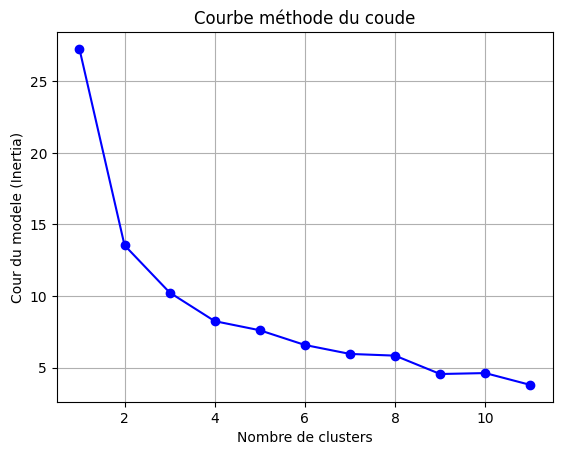

In [42]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, marker="o", color="blue")
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")
plt.title("Courbe méthode du coude")
plt.grid(1)
plt.show()

# Nettoyage des données (enlever anomalies)

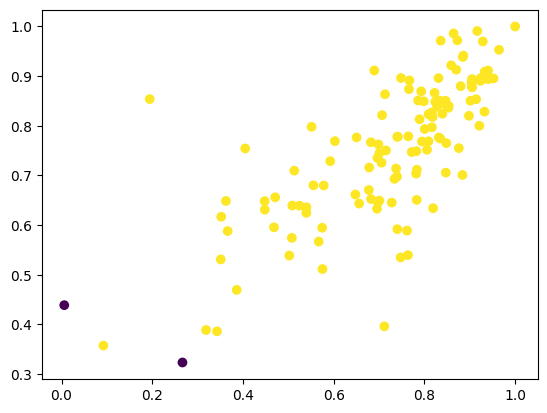

In [43]:
clean_model = IsolationForest(contamination=0.01)
clean_model.fit(df_athletes)
plt.scatter(df_athletes["ski_points"], df_athletes["air_points"], c=clean_model.predict(df_athletes))

# Clustering sur les données

In [55]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
df_athletes["cluster"] = model.fit_predict(df_athletes)
model.cluster_centers_

array([[0.61112007, 0.65368077, 0.74502757, 0.78812093, 0.21828191,
        0.68119437, 0.66623393, 0.65329565, 0.62266931],
       [0.83788149, 0.84932829, 0.85952625, 0.90025906, 0.094581  ,
        0.85074628, 0.85574046, 0.83267274, 0.82486256],
       [0.2519036 , 0.4136831 , 0.59277122, 0.70909158, 0.5616419 ,
        0.55048178, 0.5204956 , 0.38248573, 0.29401039]])

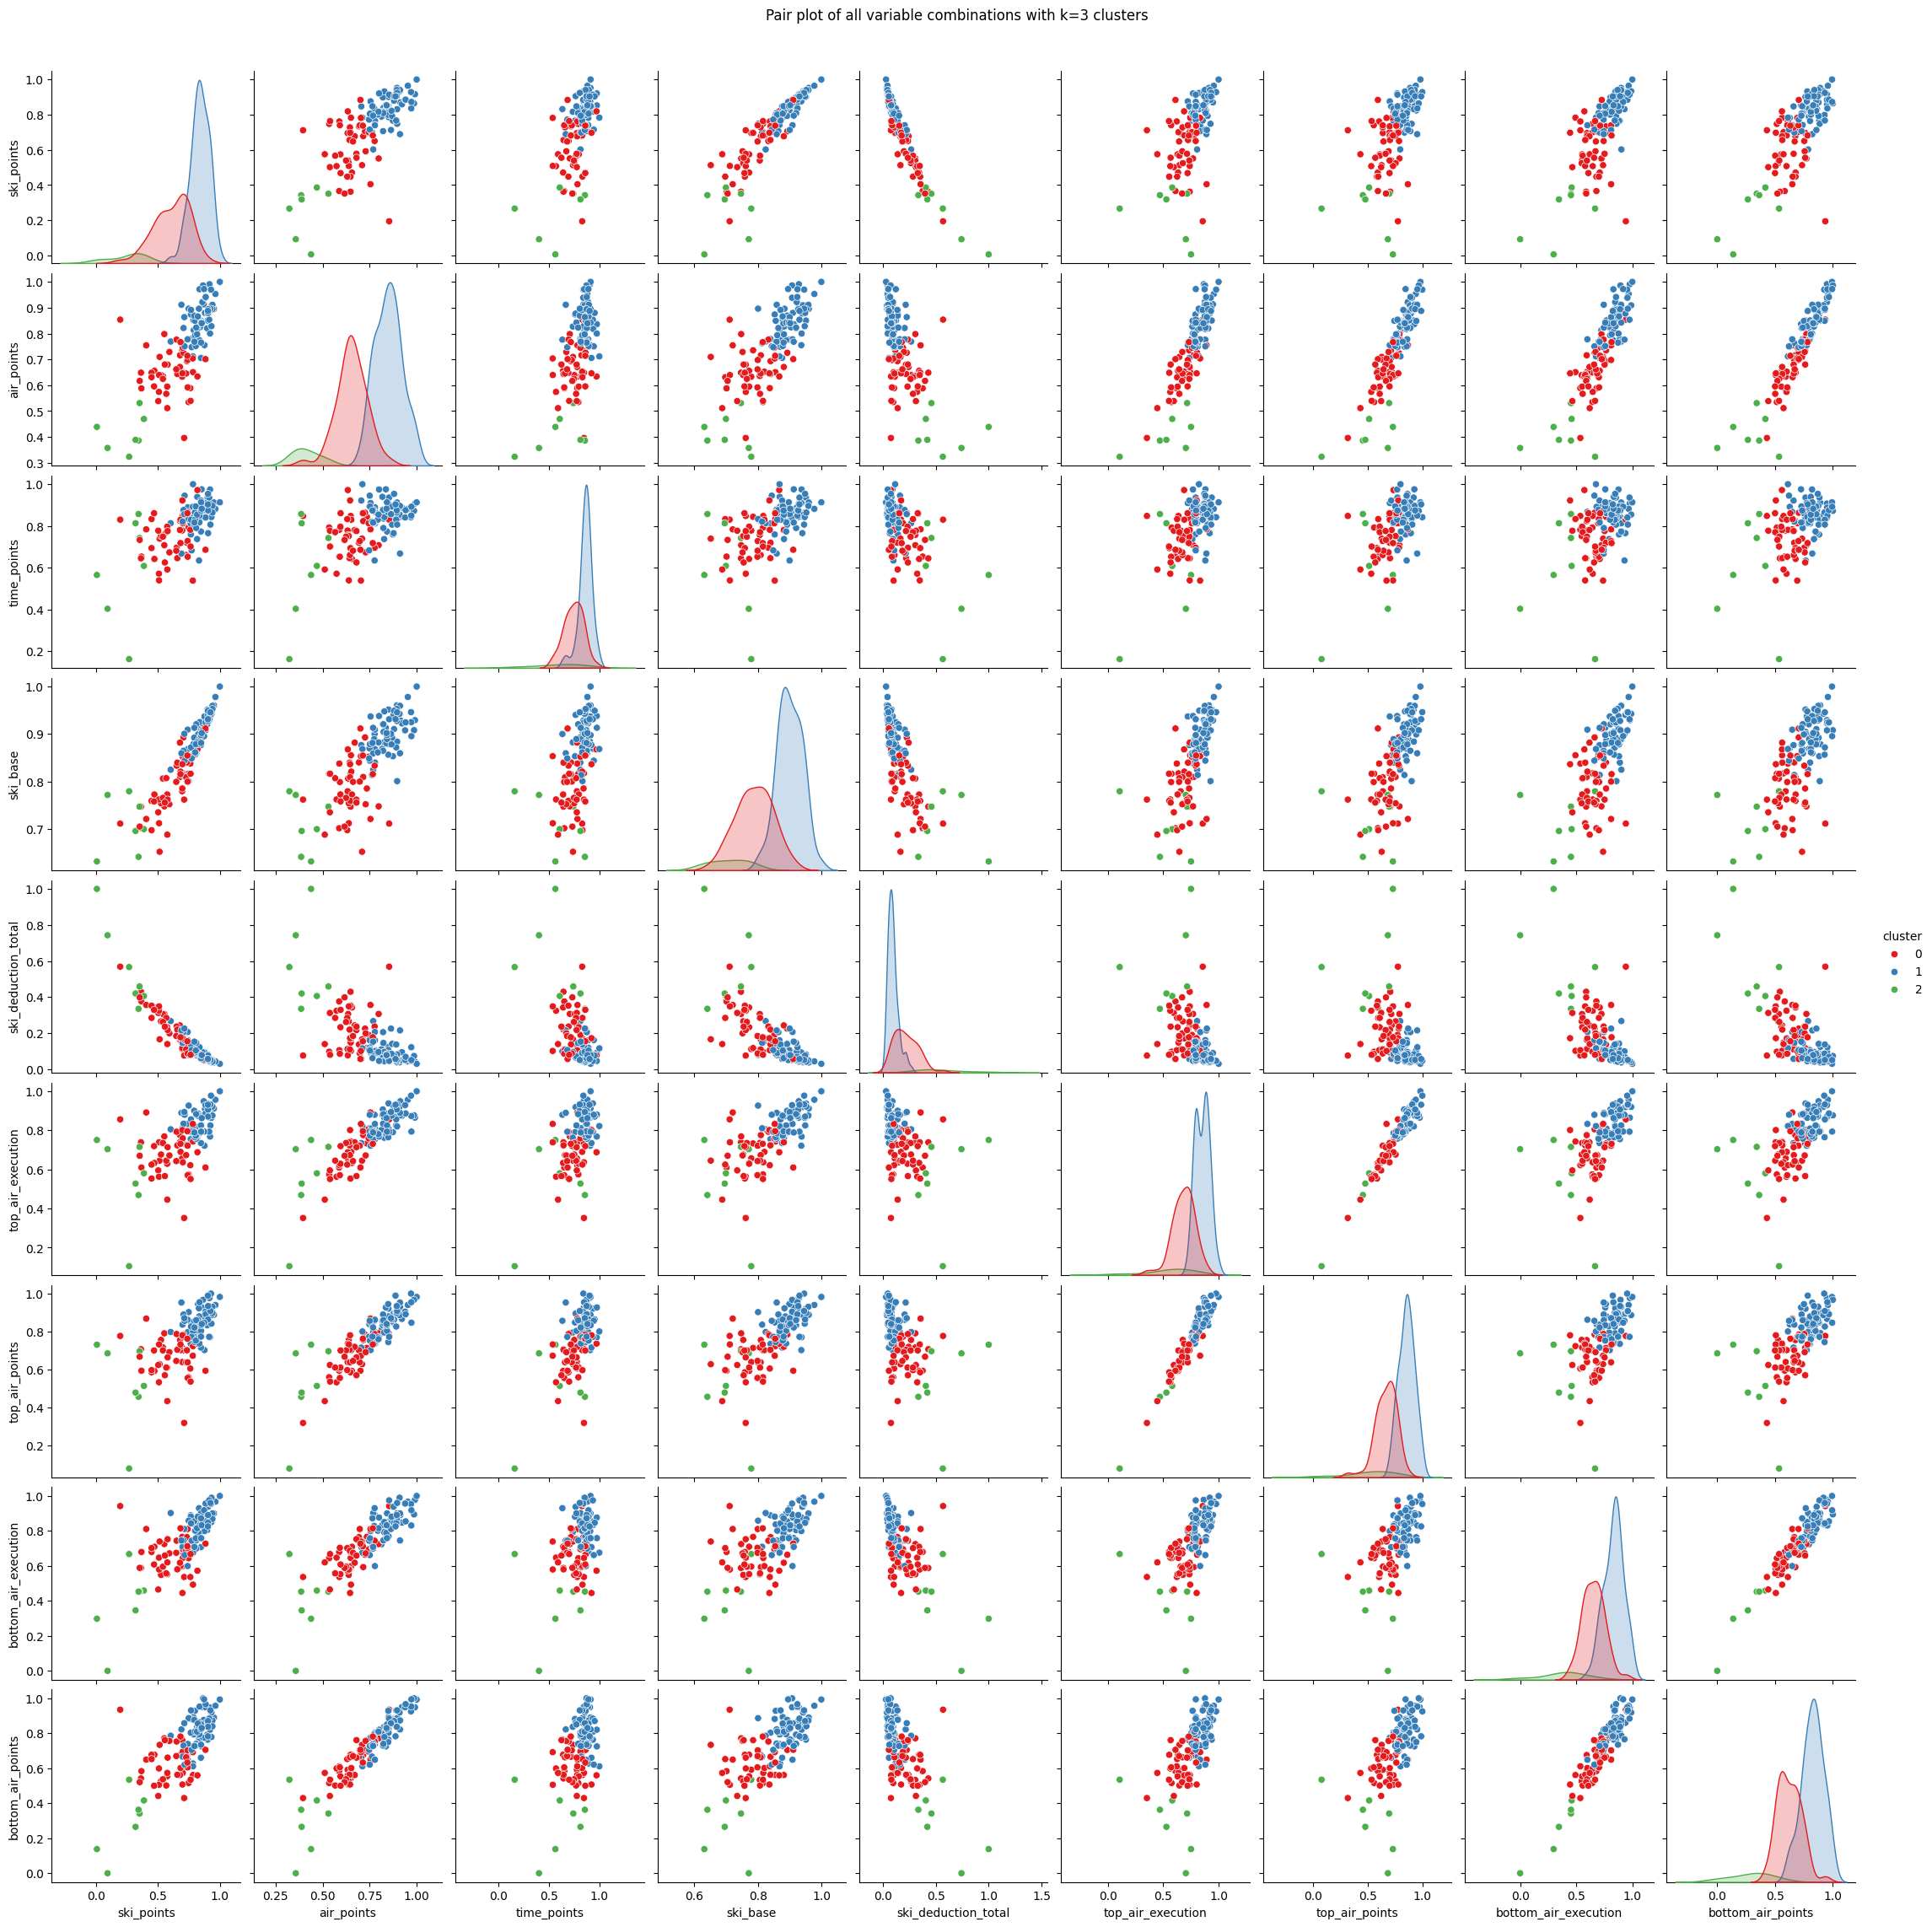

In [56]:
sns.pairplot(df_athletes, hue="cluster", palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()

# Réduction de la dimension

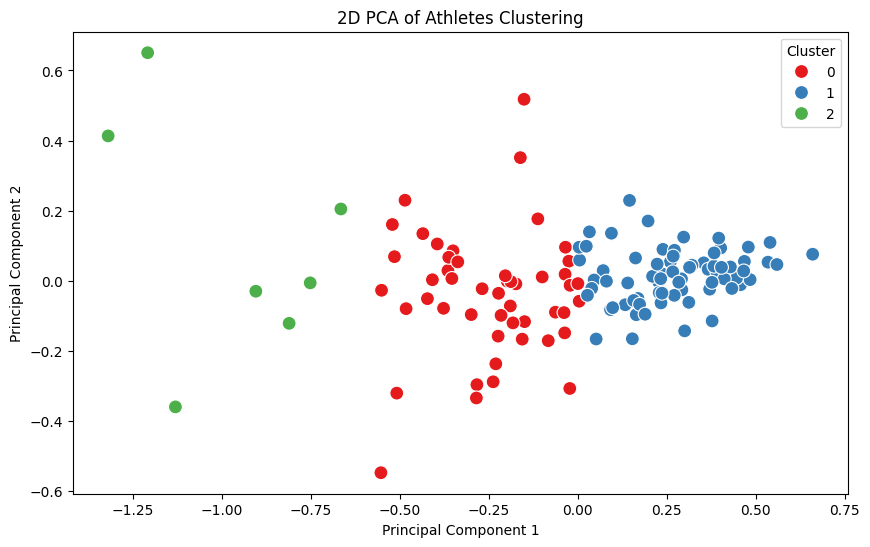

In [57]:
df_athletes_second = df_athletes.drop("cluster", axis=1)

reduct_model = PCA(n_components=2)
athletes_reduced = reduct_model.fit_transform(df_athletes_second)

df_athletes["PCA1"] = athletes_reduced[:, 0]
df_athletes["PCA2"] = athletes_reduced[:, 1]

# Visualisation des clusters dans le nouvel espace 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_athletes, x="PCA1", y="PCA2", hue="cluster", palette="Set1", s=100)

# Ajout de titres et labels
plt.title("2D PCA of Athletes Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [10]:
reduct_model.components_

array([[ 0.97584112,  0.17031377,  0.13684786],
       [-0.19797727,  0.4243906 ,  0.88357095]])